<a href="https://colab.research.google.com/github/prashanth-ds-ml/hello-world/blob/main/scanning_with_camera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
path = '/content/current_bill.jpg'
# reading the image 
img = cv2.imread(path)

In [3]:
print(img.shape)

(900, 675, 3)


(800, 1000, 3)


<function matplotlib.pyplot.show(*args, **kw)>

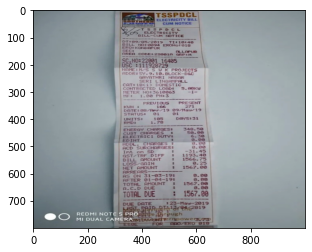

In [4]:
# resize the image
# as opencv uses BGR format ,
# converting to RBG

img = cv2.resize(img,(1000,800))
print(img.shape)
plt.imshow(img)
plt.show

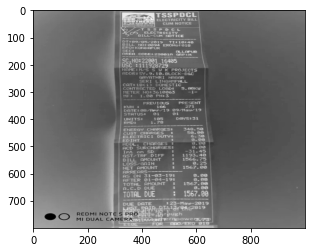

In [5]:
# removing the noise by blurring the image
# 1.converting to gray scale
original = img.copy()
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap = 'binary')
plt.show()

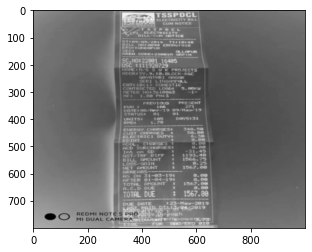

In [6]:
# 2.blurring the image
blur = cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(blur,cmap = 'binary')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

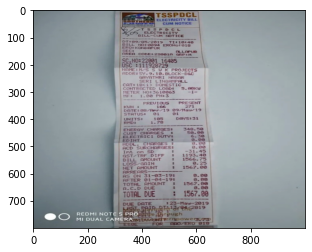

In [7]:
regenerated = cv2.cvtColor(blur,cv2.COLOR_GRAY2BGR)
plt.imshow(original)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

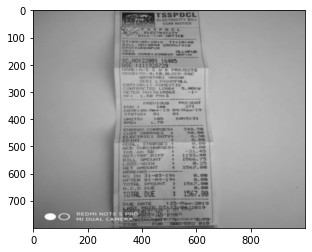

In [8]:
plt.imshow(regenerated)
plt.show

In [9]:
regenerated.shape

(800, 1000, 3)

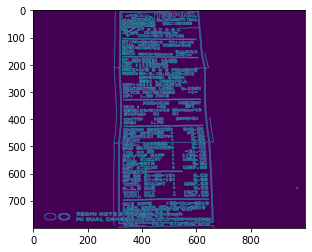

In [10]:
# 3. edge detection using canny

edges = cv2.Canny(blur,0,100)
original_edges = edges.copy()

plt.imshow(original_edges)
plt.show()

In [11]:
# 4.countours extraction

contours, _ = cv2.findContours(edges,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

In [12]:
contours

(array([[[583, 791]],
 
        [[582, 792]],
 
        [[581, 792]],
 
        ...,
 
        [[586, 792]],
 
        [[585, 791]],
 
        [[584, 791]]], dtype=int32), array([[[508, 785]],
 
        [[509, 784]],
 
        [[510, 784]],
 
        [[511, 784]],
 
        [[512, 784]],
 
        [[513, 785]],
 
        [[512, 786]],
 
        [[511, 787]],
 
        [[510, 787]],
 
        [[509, 786]]], dtype=int32), array([[[337, 785]],
 
        [[338, 784]],
 
        [[339, 784]],
 
        [[340, 784]],
 
        [[341, 784]],
 
        [[342, 784]],
 
        [[343, 784]],
 
        [[344, 784]],
 
        [[345, 784]],
 
        [[346, 785]],
 
        [[347, 786]],
 
        [[347, 787]],
 
        [[346, 788]],
 
        [[345, 788]],
 
        [[344, 789]],
 
        [[343, 789]],
 
        [[342, 788]],
 
        [[341, 787]],
 
        [[342, 786]],
 
        [[341, 787]],
 
        [[340, 787]],
 
        [[341, 787]],
 
        [[342, 788]],
 
        [[341, 789]],
 
 

In [13]:
print(len(contours))

1587


In [14]:
contours = sorted(contours,reverse = True,key = cv2.contourArea)

In [15]:
# selecting the best contour region


for c in contours:

  a = cv2.arcLength(c,True)

  approx = cv2.approxPolyDP(c, 0.01*a ,True)

  if len(approx) == 4 :
     target = approx
     break

print(target.shape)

(4, 1, 2)


In [16]:
# reording the contours

def reorder(h):
  h= h.reshape((4,2))
  print(h)
  hnew = np.zeros((4,2),dtype = np.float32)

  add = h.sum(axis = 1)
  hnew[3] = h[np.argmax(add)]
  hnew[1] = h[np.argmax(add)]

  diff = np.diff(h,axis = 1)
  hnew[0] = h[np.argmax(diff)]
  hnew[2] = h[np.argmax(diff)]

  return hnew



In [17]:
reorder = reorder(target)

[[501 328]
 [504 326]
 [590 327]
 [589 329]]


In [18]:
# projecting to a fixed screen

input = reorder

output = np.float32([[0,0],[800,0],[800,800],[0,800]])

In [19]:
M = cv2.getPerspectiveTransform(input,output)
final_pic = cv2.warpPerspective(original,M,(800,800))

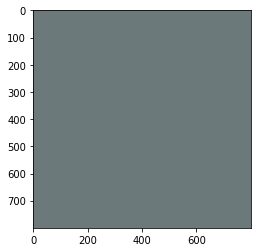

In [20]:
plt.imshow(final_pic)
plt.show()